In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.constants.events import SCL5_DIVISIONS, select_scl5
from triple_agent.reports.specific.stop_talks import stop_talk_in_game_percentage
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties

In [4]:
scl5_replays = get_parsed_replays(select_scl5)

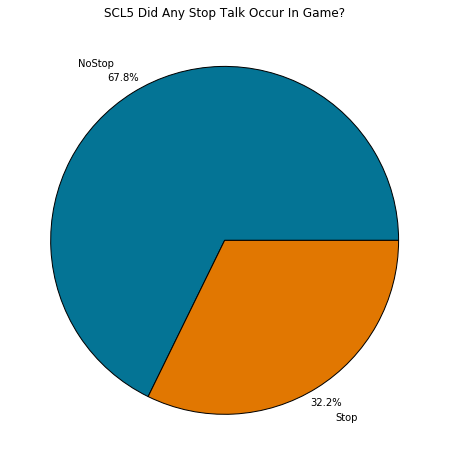

In [5]:
stop_talk_in_game_percentage(
    scl5_replays,
    axis_properties = AxisProperties(title="SCL5 Did Any Stop Talk Occur In Game?"))

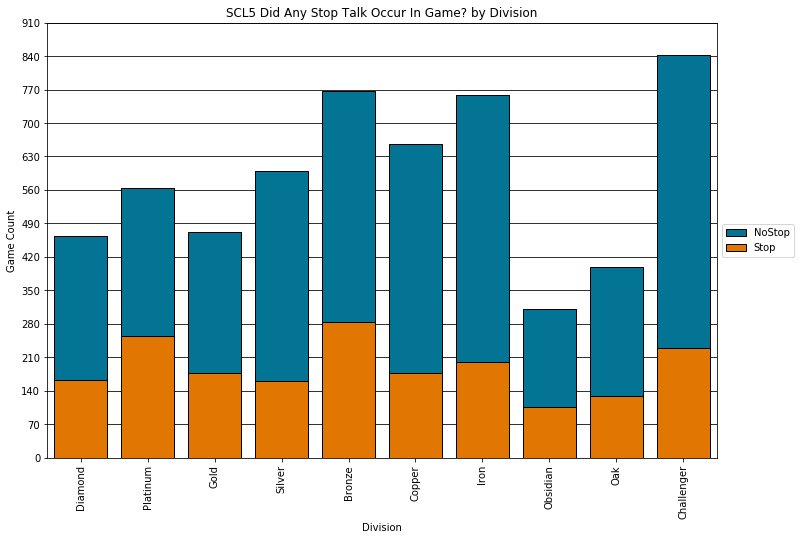

In [8]:
stop_talk_in_game_percentage(
    scl5_replays,
    axis_properties = AxisProperties(
        title='SCL5 Did Any Stop Talk Occur In Game? by Division',
        x_axis_label="Division",
        y_axis_label="Game Count",        
    ),
    data_query = DataQueryProperties(
        groupby=lambda g: g.division,
        category_order=lambda name_series: SCL5_DIVISIONS.index(name_series[0]),
    )
)

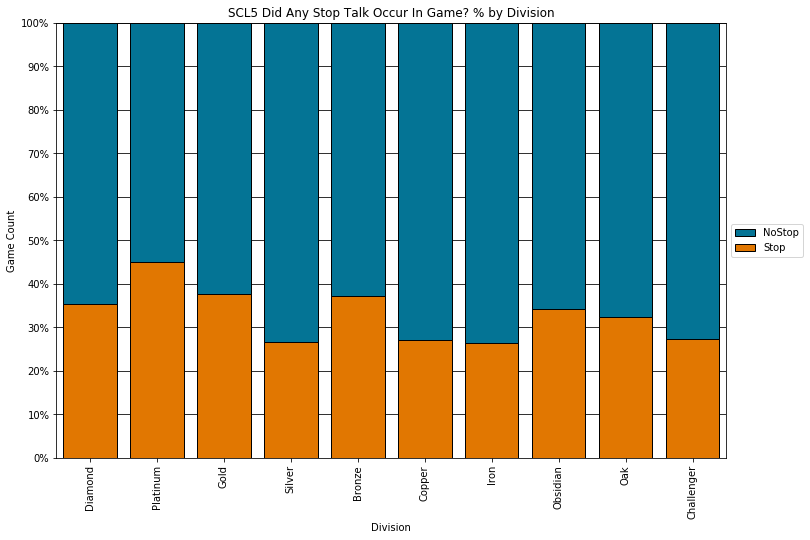

In [9]:
stop_talk_in_game_percentage(
    scl5_replays,
    axis_properties = AxisProperties(
        title='SCL5 Did Any Stop Talk Occur In Game? % by Division',
        x_axis_label="Division",
        y_axis_label="Game Count",
    ),
    data_query = DataQueryProperties(
        groupby=lambda g: g.division,
        category_order=lambda name_series: SCL5_DIVISIONS.index(name_series[0]),
        percent_normalized_data=True,
    )
)

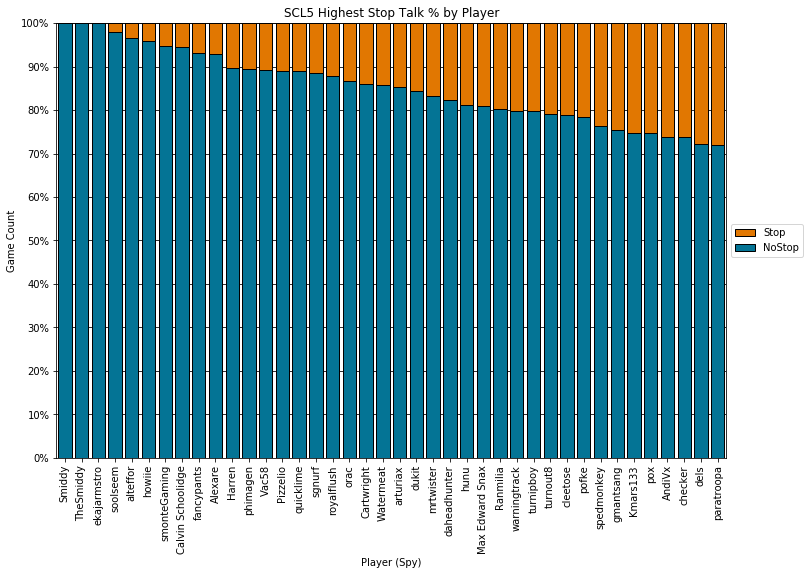

In [11]:
stop_talk_in_game_percentage(
    scl5_replays,
    axis_properties = AxisProperties(
        title='SCL5 Highest Stop Talk % by Player',
        x_axis_label="Player (Spy)",
        y_axis_label="Game Count",
    ),
    data_query = DataQueryProperties(
        groupby=lambda g: g.spy,
        category_order=lambda name_series: name_series[1]['Stop'],
        stack_order = ['Stop','NoStop'],
        percent_normalized_data=True,
        limit=40
    )
)

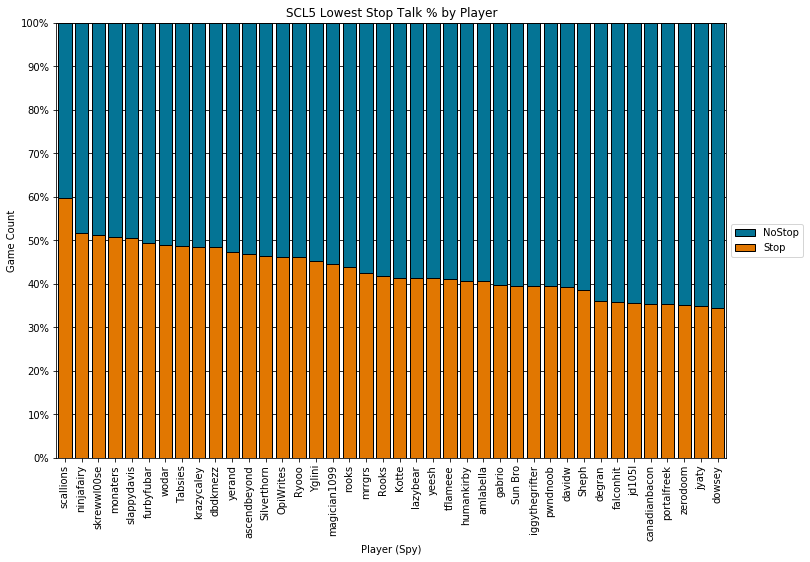

In [12]:
stop_talk_in_game_percentage(
    scl5_replays,
    axis_properties = AxisProperties(
        title='SCL5 Lowest Stop Talk % by Player',
        x_axis_label="Player (Spy)",
        y_axis_label="Game Count",
    ),
    data_query = DataQueryProperties(
        groupby=lambda g: g.spy,
        category_order=lambda name_series: name_series[1]['NoStop'],
        percent_normalized_data=True,
        limit=40
    )
)